#### Keras 分类测试

In [1]:
import sys
sys.path.append("..")

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from stock_ai import ploter
from examples import get_data_classification

Using TensorFlow backend.


PLEASE install TALIB to call these methods
PLEASE install TALIB to call these methods


##### 获取数据

完整数据为601398日线数据+399300日线数据

默认取 5 天的数据作为输入数据。第 6 天的数据为结果数据。以此类推。采用 `TimeseriesGenerator`

In [2]:
(x_train, y_train), (x_test, y_test) = get_data_classification()

print(x_train.shape, 'x_train sequences')
print(y_train.shape, 'y_train sequences')
print(x_test.shape, 'x_test sequences')
print(y_test.shape, 'y_test sequences')

(2679, 5, 12) x_train sequences
(2679, 22) y_train sequences
(298, 5, 12) x_test sequences
(298, 22) y_test sequences


`x`为所有数据（标准化后）

标准化采用的是`sklearn.preprocessing.MinMaxScaler`

In [3]:
x_train[0]

array([[0.44019139, 0.41416497, 0.1384064 , 0.        , 0.29193075,
        0.33208375, 1.        , 1.        , 0.33333333, 0.        ,
        1.        , 1.        ],
       [0.        , 0.        , 0.        , 0.17704999, 0.        ,
        0.        , 0.        , 0.14285714, 0.        , 0.5       ,
        0.0894123 , 0.08637297],
       [0.23695603, 0.53162343, 0.51640474, 0.6259542 , 0.23137238,
        0.32541408, 0.07692308, 0.21428571, 1.        , 1.        ,
        0.03969298, 0.03906662],
       [0.66097061, 0.96677354, 0.90956714, 0.99384388, 0.51136444,
        0.74617964, 0.23076923, 0.07142857, 1.        , 1.        ,
        0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.23076923, 0.        , 0.        , 0.        ,
        0.01725269, 0.01642542]])

`y`为601398的close.pct_change()后的数据（onehot编码后）

onehot编码采用`sklearn.preprocessing.OneHotEncoder`

In [4]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.])

In [5]:
def build_model():
    print('Building model...')
    model = Sequential()
    model.add(LSTM(512, input_shape=x_train[0].shape))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [6]:
batch_size = 32
epochs = 50
num_classes = y_train.shape[1]

model=build_model()

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_split=0.1)

Building model...
Instructions for updating:
Colocations handled automatically by placer.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\framework\op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.cast instead.


QUANTAXIS>> From C:\Users\GuQiang\Anaconda3\envs\stock_ai\lib\site-packages\tensorflow\python\ops\math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 2411 samples, validate on 268 samples
Epoch 1/50
 - 5s - loss: 2.0706 - acc: 0.3401 - val_loss: 1.5315 - val_acc: 0.5448
Epoch 2/50
 - 4s - loss: 1.9322 - acc: 0.3550 - val_loss: 1.5006 - val_acc: 0.5448
Epoch 3/50
 - 4s - loss: 1.9233 - acc: 0.3633 - val_loss: 1.5529 - val_acc: 0.5448
Epoch 4/50
 - 4s - loss: 1.9138 - acc: 0.3600 - val_loss: 1.4765 - val_acc: 0.5448
Epoch 5/50
 - 4s - loss: 1.9158 - acc: 0.3658 - val_loss: 1.4842 - val_acc: 0.5448
Epoch 6/50
 - 4s - loss: 1.9108 - acc: 0.3658 - val_loss: 1.4448 - val_acc: 0.5448
Epoch 7/50
 - 4s - loss: 1.9101 - acc: 0.3633 - val_loss: 1.4789 - val_acc: 0.5448
Epoch 8/50
 - 4s - loss: 1.9104 - acc: 0.3642 - val_loss: 1.5381 - val_acc: 0.5448
Epoch 9/50
 - 4s - loss: 1.9010 - acc: 0.3662 - val_loss: 1.4588 - val_acc: 0.5448
Epoch 10/50
 - 4s - loss: 1.9043 - acc: 0.3662 - val_loss: 1.4663 - val_acc: 0.5448
Epoch 11/50
 - 4s - loss: 1.9082 - acc: 0.3654 - val_loss: 1.4978 - val_acc: 0.5448
Epoch 12/50
 - 4s - loss: 1.9014 - acc

In [7]:
keras.utils.print_summary(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 512)               1075200   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                11286     
_________________________________________________________________
activation_2 (Activation)    (None, 22)                0         
Total params: 1,086,486
Trainable params: 1,086,486
Non-trainable params: 0
_________________________________________________________________


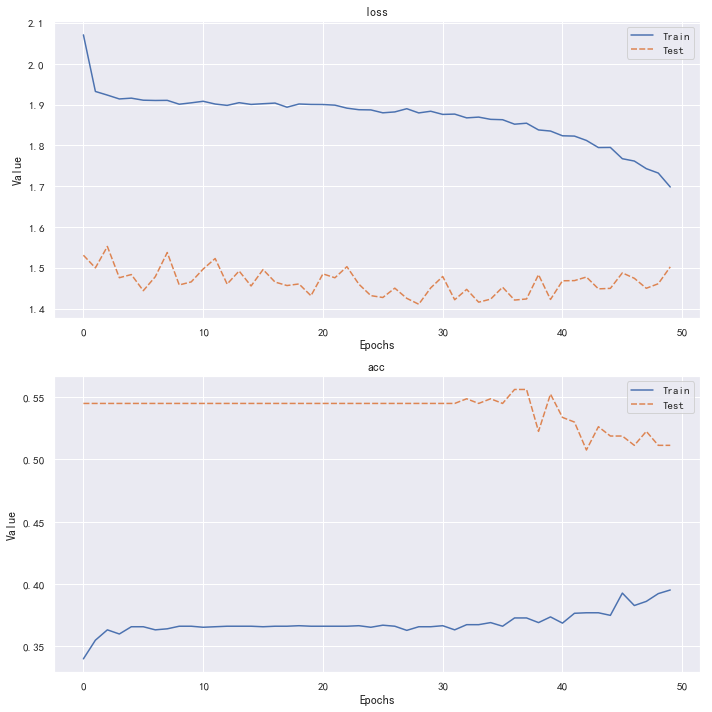

<module 'matplotlib.pyplot' from 'C:\\Users\\GuQiang\\Anaconda3\\envs\\stock_ai\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [8]:
ploter.plot_keras_history(history)

In [9]:
score = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=1)
'Test score:{0},Test accuracy:{1}'.format(score[0],score[1])

298/298 [==============================] - ETA:  - ETA:  - 0s 425us/step


'Test score:1.9757319424776423,Test accuracy:0.3255033559047136'